## Image to Image using Diffusion Models
The most popular image-to-image models are Stable `Diffusion v1.5`, `Stable Diffusion XL (SDXL)`, and `Kandinsky 2.2`. The results from the Stable Diffusion and Kandinsky models vary due to their architecture differences and training process; you can generally expect SDXL to produce higher quality images than Stable Diffusion v1.5. Let’s take a quick look at how to use each of these models and compare their results.

In [ ]:
!pip install diffusers
!pip install accelerate
!pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinu

In [ ]:
import os, glob
import random, math
import numpy as np
import pandas as pd
import torch

from PIL import Image
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid

## 1. Stable Diffusion 2.1

In [ ]:
model_id = "stabilityai/stable-diffusion-2-1"

pipeline = AutoPipelineForImage2Image.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True
).to("cuda")
pipeline.enable_model_cpu_offload()

# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
prompts = ["a pixar animation of man with a hat standing next to a blue car, with a blue sky and clouds",
           "a lego man with a hat standing next to a blue car, with a blue sky and clouds",
           "ice cream texture, a man with a hat standing next to a blue car, with a blue sky and clouds"]
init_images = ["test.jpg"]
init_imgs = [Image.open(image).convert("RGB").resize((768,768)) for image in init_images]
outputs = []
for p in prompts:
  image = pipeline(p, image=init_imgs).images[0]
  outputs.append(image)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

a pixar animation of man with a hat standing next to a blue car, with a blue sky and clouds


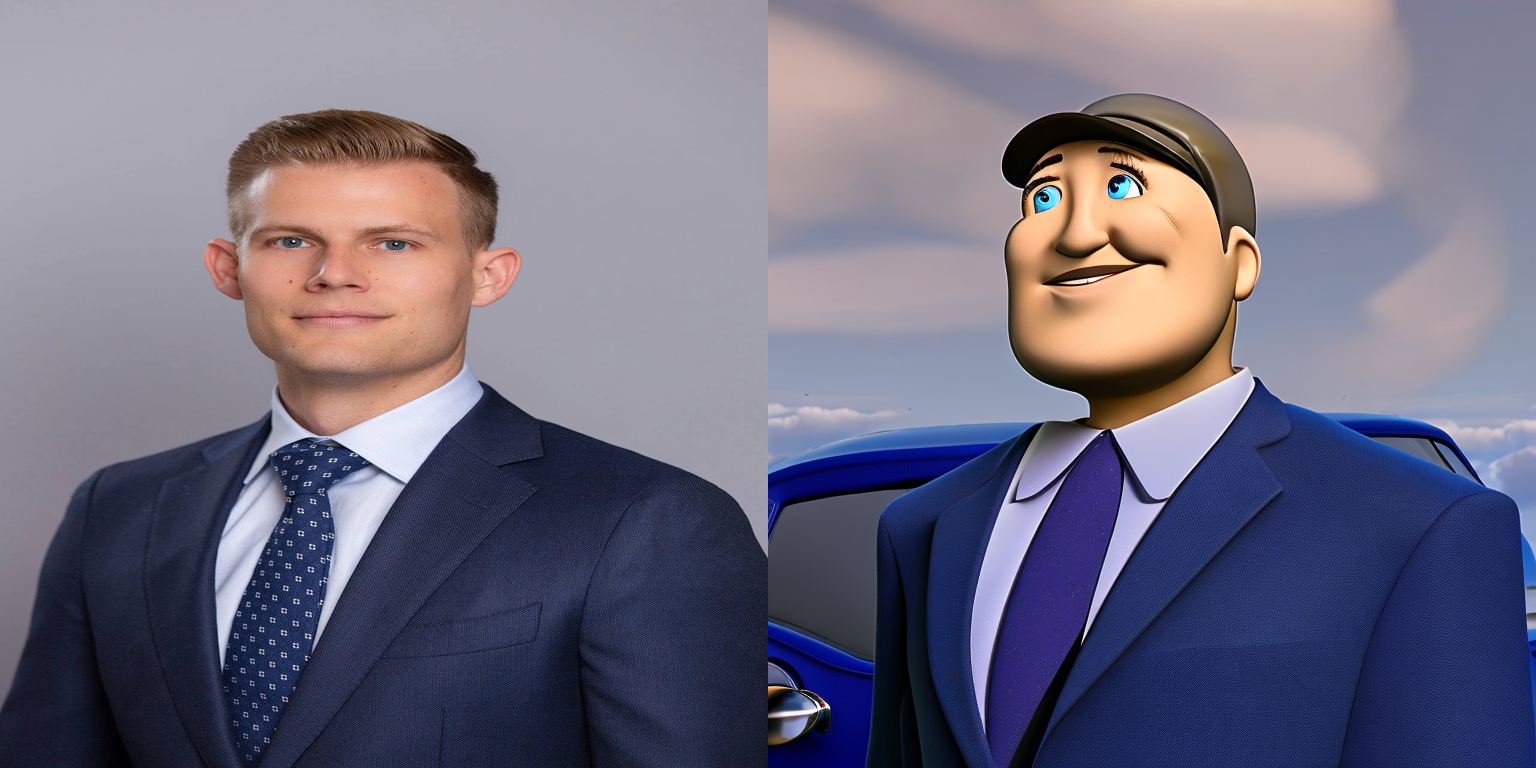

In [ ]:
print(prompts[0])
make_image_grid([init_imgs[0], outputs[0]], rows=1, cols=2)

a lego man with a hat standing next to a blue car, with a blue sky and clouds


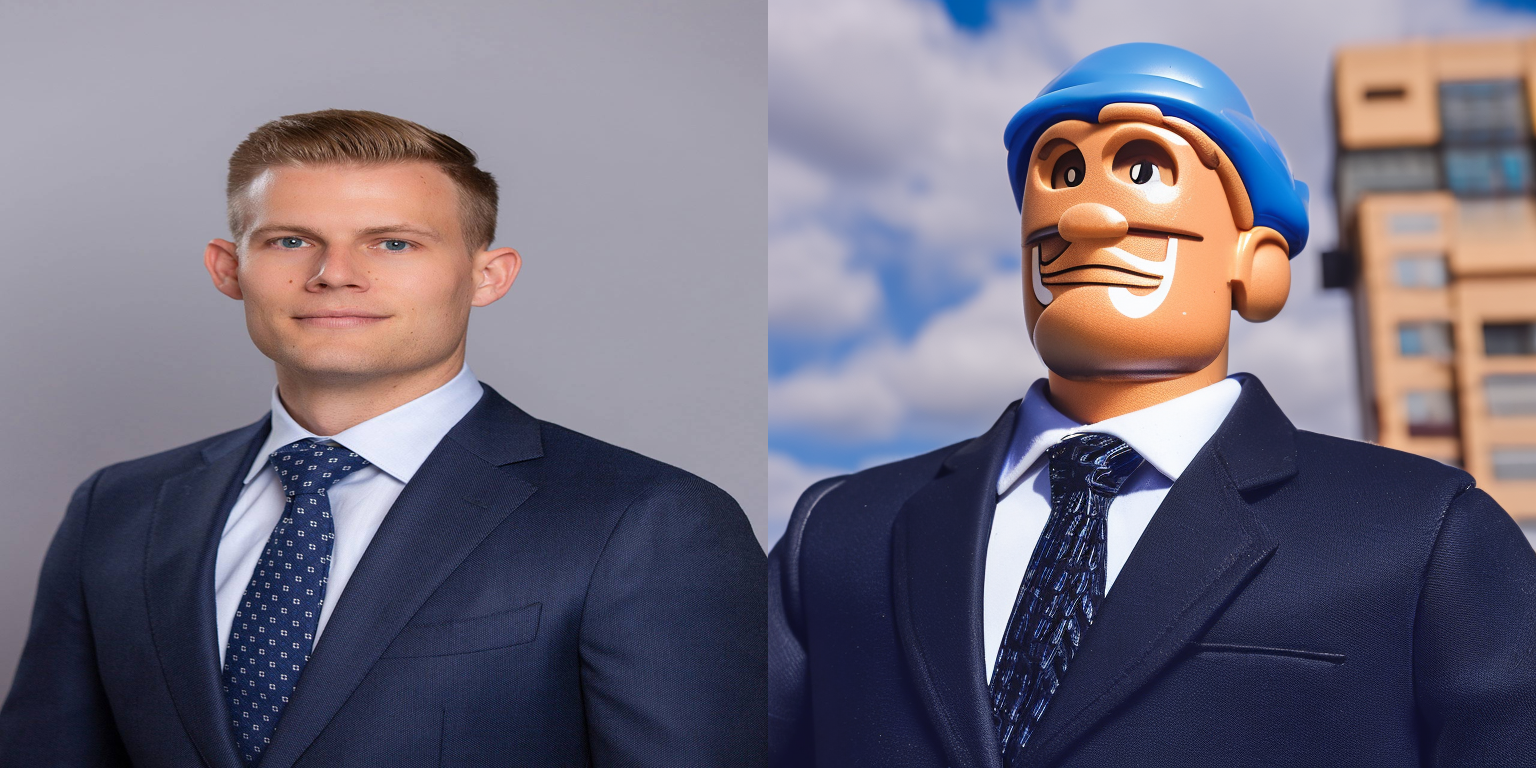

In [ ]:
print(prompts[1])
make_image_grid([init_imgs[0], outputs[1]], rows=1, cols=2)

ice cream texture, a man with a hat standing next to a blue car, with a blue sky and clouds


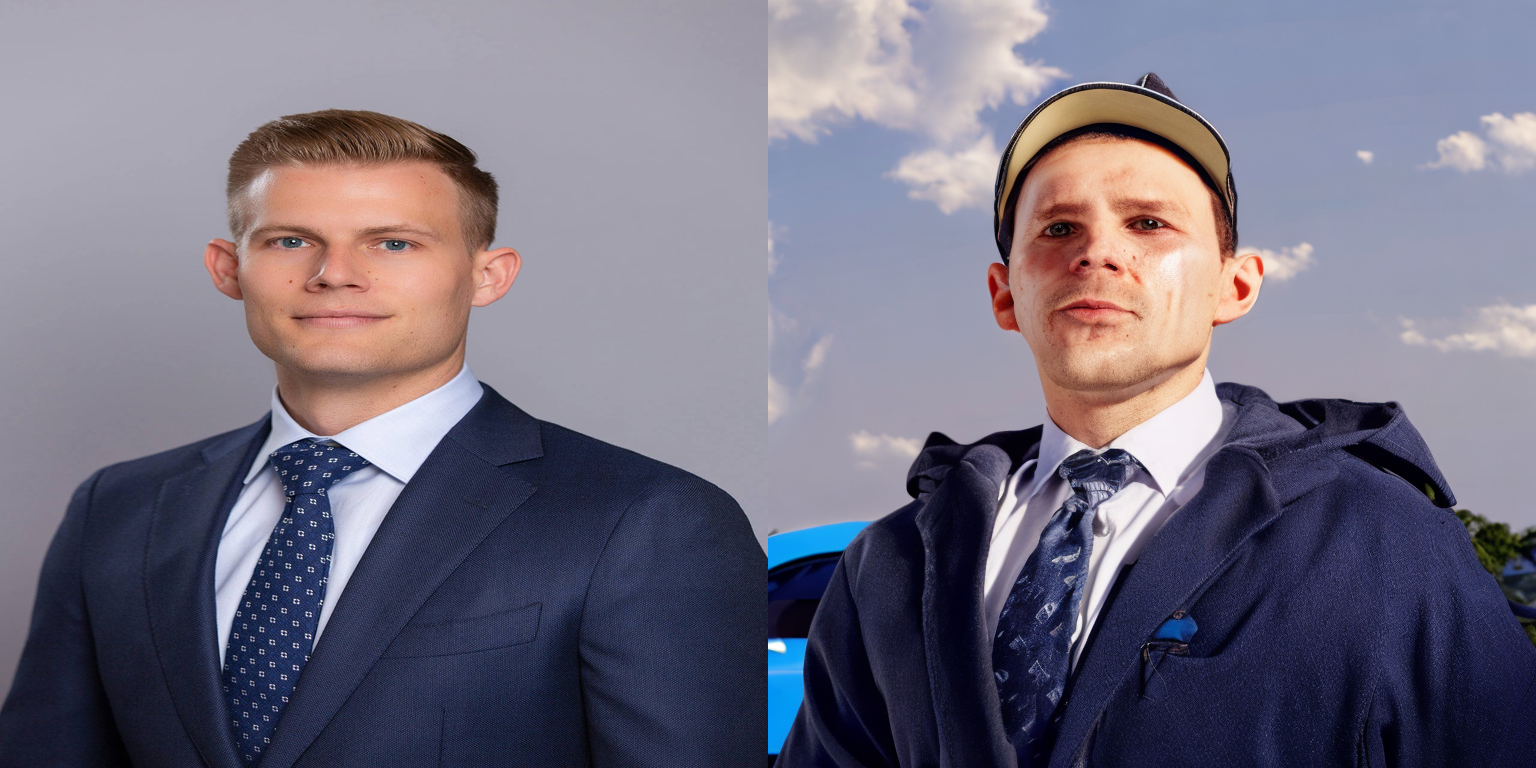

In [ ]:
print(prompts[2])
make_image_grid([init_imgs[0], outputs[2]], rows=1, cols=2)

## 2. Custom Model

i. Image to Image

In [ ]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline
from diffusers.utils import load_image

In [ ]:
model_id = "instruction-tuning-sd/cartoonizer"
pipeline = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16, use_auth_token=True
).to("cuda")

vae/diffusion_pytorch_model.safetensors not found
Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionInstructPix2PixPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
img_path = "wp7900881.jpg"
image = Image.open(img_path).convert("RGB")

output = pipeline("Cartoonize the following image", image=image).images[0]


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


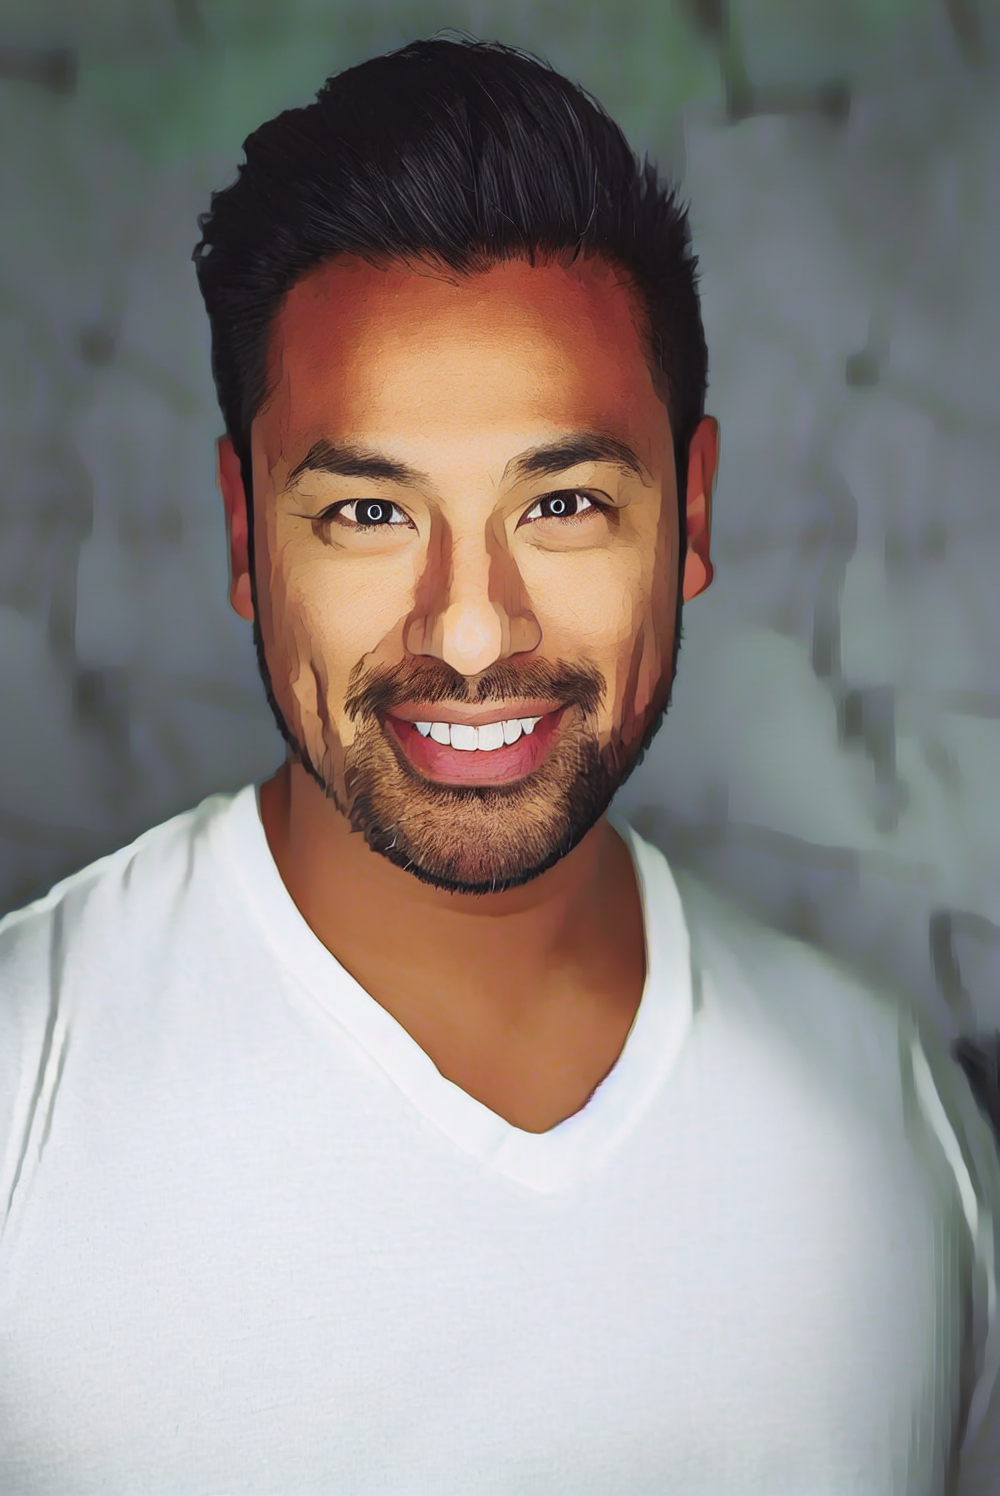

In [ ]:
output